# Homing error light/dark descriptive

In this notebook we want to characterize the homing ability of mice during light and dark trials.

We answer the following questions:

* Are mice performing at chance in darkness? 
* Are they as good as during light trials?


In [1]:
import pandas as pd
import numpy as np
import os.path
from autopipy.project import Project

We get our project object with its session list. Then we load the training set with the trial features.

In [2]:
projectName="autopi_behavior_2021"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)
fn=myProject.dataPath+"/testing_sessions"
print("Reading " + fn)
sessionNamesTesting = pd.read_csv(fn) # this will be a pandas dataframe
myProject.createSessionList(sessionNameList=sessionNamesTesting.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models
Reading /adata/projects/autopi_behavior_2021/testing_sessions
We have 67 recording sessions


In [3]:
fn =  myProject.dataPath+"/results/trialsTrainSet.csv"
df = pd.read_csv(fn)
print("Number of trials: {}".format(len(df)))
print("Number of valid trials: {}".format(sum(df.valid)))

# get rid of invalid trials
df = df[df.valid]
print(len(df))

Number of trials: 4520
Number of valid trials: 4453
4453


We should show examples of homing during light and dark trials. Maybe examples from one selected session. 


In [4]:
ses1 = myProject.sessionList[20]
ses1.extractTrialFeatures()
ses2 = myProject.sessionList[0]
ses2.extractTrialFeatures()
ses3 = myProject.sessionList[10]
ses3.extractTrialFeatures()



mn4673-06102019-1534 trial segmentation
Remove door closing event at the beginning of the session, index 21
problem with the door alternation
Problem with index 908
Removing the second of two door closings (index :908)
Problem with index 1614
Removing the second of two door closings (index :1614)
Number of trials : 89
mn4673-06102019-1534, video len: 108793, video-log len:108793, first frame: 0, max log gap: 7.0, mean time diff: 0.0335, max time diff: 0.126, num problem diff: 0, frame rate: 29.8
Lenght of mouseLeverPosi: 108793
Lenght of videoLog: 108793
mn4673-06102019-1534_4, self.startTime was adjusted by -0.2 s
mn4673-06102019-1534_5, self.startTime was adjusted by -0.3 s
mn4673-06102019-1534_7, self.startTime was adjusted by -0.2 s
mn4673-06102019-1534_8, self.startTime was adjusted by -0.3 s
mn4673-06102019-1534_9, self.startTime was adjusted by -0.3 s
mn4673-06102019-1534_10, self.startTime was adjusted by -0.3 s
mn4673-06102019-1534_11, self.startTime was adjusted by -0.2 s
mn4

/home/maryam/repo/autopipy/autopipy/trial.py:1225: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.sum(uv*urv,axis=1))


mn4672-02102019-1809_15, self.startTime was adjusted by -0.6 s
mn4672-02102019-1809_18, self.startTime was adjusted by -0.1 s
mn4672-02102019-1809_19, self.startTime was adjusted by -0.1 s
mn4672-02102019-1809_24, self.startTime was adjusted by -0.2 s
mn4672-02102019-1809_25, self.startTime was adjusted by -0.2 s
mn4672-02102019-1809_26, self.startTime was adjusted by -0.1 s
mn4672-02102019-1809_27, self.startTime was adjusted by -0.3 s
mn4672-02102019-1809_29, self.startTime was adjusted by -0.2 s
mn4672-02102019-1809_32, self.startTime was adjusted by -0.2 s
mn4672-02102019-1809_33, self.startTime was adjusted by -0.2 s
There is a journey starting after the first lever press
   start    end
0  53333  53513
1  53514  54263
2  54264  54736
3  54737  55367
             time  videoIndex
867  1.570034e+09       54312
870  1.570034e+09       55004
lastEnd: 55367
mn4672-02102019-1809_34, self.startTime was adjusted by -0.1 s
mn4672-02102019-1809_37, mouse not in the lever zone when the leve

Make a first figure showing examples from 3 sessions

mean error at peri
light: 7.442308927657591
dark: 30.066731674678728
median error at peri
light: 4.256644996034638
dark: 18.147858142760622
Wilcoxon test against 90 degree
WilcoxonResult(statistic=68330.0, pvalue=1.3742336607970736e-289)
mean heading error
light: 12.506574665250076
dark: 46.56215462243094
median heading error
light: 7.930765973623266
dark: 38.39923230055762
Saving to /adata/projects/autopi_behavior_2021/results/homing_error_light_dark_descriptive_01.pdf



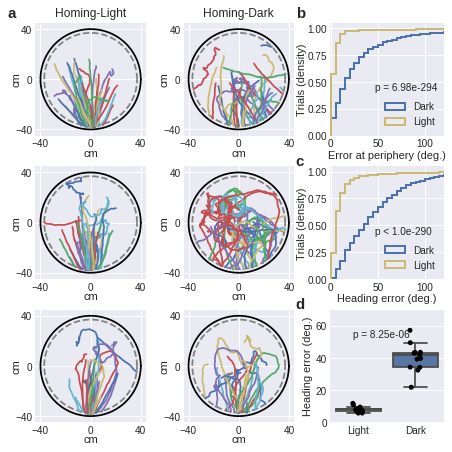

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
plt.style.use("seaborn")
al=0.8

col=3
row=3
sizePerPlot=2.45
fig = plt.figure(figsize=(col*sizePerPlot,row*sizePerPlot))
gs = gridspec.GridSpec(row,col,wspace=0.3, hspace=0.27) #
fig.tight_layout()

# to plot the arena circle
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
arenaRadiusProportionToPeri=0.925
arenaRadius = 40

###########################################
### plot the examples from 3 sessions 
###########################################
mySessions = [ses1,ses2,ses3] 
for i, ses in enumerate(mySessions):
    for j, lc in enumerate(["light","dark"]):
        ax = plt.subplot(gs[i,j])
        if i == 0:
            ax.set_title("Homing-{}".format(lc.capitalize()))
        ax.set_aspect('equal', adjustable='box')
        ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,color="black")
        ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
                       color="gray",linestyle='dashed')
        ax.set_xlabel("cm")
        ax.set_ylabel("cm")
        ax.set_ylim(-45,45)
        ax.xaxis.set_label_coords(0.5, -0.11)
        ax.yaxis.set_label_coords(-0.125, 0.5)
        ax.set_xticks(np.arange(-40,80,40))
        ax.set_yticks(np.arange(-40,80,40))
        ax.tick_params(axis='both', which='major', pad=3)
        trials = [t for t in ses.trialList if t.light==lc and t.valid]
        
        ## plot the path 
        for t in trials:
            if t.pathD["homingPeriNoLever"].pPose is not None:
                ax.plot(t.pathD["homingPeriNoLever"].pPose[:,0],t.pathD["homingPeriNoLever"].pPose[:,1])

#########################################
### error at peri and vl
#########################################
al = 1
ax = plt.subplot(gs[0,2])

valD = df["angularErrorHomingPeri"][df.light=="dark"]
valL = df["angularErrorHomingPeri"][df.light=="light"]

ax.hist(valD, 
        bins = np.arange(0,180,5),cumulative=True, density = True,histtype='step',alpha=1.0,lw=2,
        color=sns.color_palette()[0],label="Dark")
#ax.axvline(x=np.nanmedian(valD),
#           color= sns.color_palette()[0] ,linestyle='dashed')

ax.hist(valL, 
        bins = np.arange(0,180,5),cumulative=True, density = True,histtype='step',alpha=1.0,lw=2,
        color=sns.color_palette()[4], label="Light")
#ax.axvline(x=np.nanmedian(valL),
#           color= "black" ,linestyle='dashed')

stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
ax.text(0.4,0.4,"p = {:.02e}".format(p_value),transform=ax.transAxes)
print("mean error at peri")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median error at peri")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))
ax.set_xlim(-1,120)
ax.set_xlabel("Error at periphery (deg.)")
ax.set_ylabel("Trials (density)")
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.13)
ax.yaxis.set_label_coords(-0.1975, 0.5)
ax.legend(loc="lower right")
print("Wilcoxon test against 90 degree")
print(stats.wilcoxon(valD-90))







#########################################
### heading error
##########################################
al = 0.6
ax = plt.subplot(gs[1,2])

valD = df["homingPeriNoLever_medianMVDeviationToTarget"][df.light=="dark"]
valL = df["homingPeriNoLever_medianMVDeviationToTarget"][df.light=="light"]

ax.hist(valD, 
        bins = np.arange(0,180,5),cumulative=True,density=True,histtype='step',alpha=1.0,lw=2,
        color=sns.color_palette()[0],label="Dark")
#ax.axvline(x=np.nanmedian(valD),
#          color= sns.color_palette()[0] ,linestyle='dashed')

ax.hist(valL, 
        bins = np.arange(0,180,5),cumulative=True,density=True,histtype='step',alpha=1.0,lw=2,
        color=sns.color_palette()[4], label="Light")
#ax.axvline(x=np.nanmedian(valL),
#           color= "black" ,linestyle='dashed')

stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
if p_value != 0.0:
    ax.text(0.4,0.4,"p = {:.02e}".format(p_value),transform=ax.transAxes)
else :
    ax.text(0.4,0.4,"p < 1.0e-290",transform=ax.transAxes)
    
print("mean heading error")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median heading error")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))

ax.set_xlim(-1,120)
ax.set_xlabel("Heading error (deg.)")
ax.set_ylabel("Trials (density)")
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.13)
ax.yaxis.set_label_coords(-0.1975, 0.5)
ax.legend(loc="lower right")

#########################################
### per mouse changes in heading error
##########################################
def mySummary(df):
    headingError=np.nanmedian(df["homingPeriNoLever_medianMVDeviationToTarget"])
    errorPeri=np.nanmedian(df["angularErrorHomingPeri"])
    return pd.DataFrame({"headingError": [headingError],
                        "errorPeri": [errorPeri]})
sDf = df.groupby(["subject","light"]).apply(mySummary).reset_index()
my_pal = {"light": sns.color_palette()[4], "dark": sns.color_palette()[0]}
ax = plt.subplot(gs[2,2])

sns.boxplot(y='headingError', x='light', 
                 data=sDf,showfliers=False,palette=my_pal,order=["light","dark"])
sns.stripplot(y='headingError', x='light', 
                 data=sDf,color="black",order=["light","dark"])
ax.set_ylim(0,70)
ax.set_ylabel("Heading error (deg.)")
ax.set_xlabel("")
plt.xticks(range(2),labels=["Light","Dark"])
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.135)
ax.yaxis.set_label_coords(-0.15, 0.5)

valL = sDf["headingError"][sDf.light=="light"]
valD = sDf["headingError"][sDf.light=="dark"]
stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
ax.text(0.2,0.75,"p = {:.02e}".format(p_value),transform=ax.transAxes)


            
#######################################
### letters 
#######################################
plt.text(0.075,0.89, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.62,0.89, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.62,0.61, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.62,0.34, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)


###########################################
### save figure  
###########################################
fileName = myProject.dataPath+"/results/homing_error_light_dark_descriptive_01.pdf"
print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=400)


Figure 5: **Homing error during light and dark trials**.
**(A)** Example of homing paths during light (left) and dark (right) trials from one representative recording session (89 trials).
**(B)** Distribution of the position at which mice reached the arena periphery during light and dark trials. 
Each red dot is the end of a homing path to periphery. A polar distribution shows the distribution of angle at which the mice reached periphery.
**(C)** Homing error at periphery during light and dark trials. The red vertical dashed line is the mean of the distribution.
**(D)** Mean homing heading error in the homing path. Homing heading error is the angle between a vector pointing in the head direction and a second vector from the animal head to the center of the bridge. Homing heading error is calculated for each data points in the homing path and the mean is calculated for each trial.

## Statistics

We need to show that ...
* Homing accuracy is better during light than dark trials
* Homing accuracy during dark trials is better than chance levels

In [11]:
from scipy import stats

def printResults(myList):
    print("light vs dark")
    print("n light: {}, dark: {}".format(len(myList[0]),len(myList[1])))
    print("median light:{:.3}, dark: {:.3}".format(np.median(myList[0]),np.median(myList[1])))
    print(stats.mannwhitneyu(x=myList[0], y =myList[1]))
    print("")

print("****ANGULAR ERROR AT PERIPHER****")    
myList = [df.angularErrorHomingPeri[df.light=="light"],
          df.angularErrorHomingPeri[df.light=="dark"]]
printResults(myList)    
    
print("****MEAN HOMING ERROR DURING THE HOMING PATH ****")
myList = [df.homingPeriNoLever_medianHDDeviationToTarget[(df.light=="light") & 
                                                         (~df.homingPeriNoLever_medianHDDeviationToTarget.isna())] ,
          df.homingPeriNoLever_medianHDDeviationToTarget[(df.light=="dark") & 
                                                         (~df.homingPeriNoLever_medianHDDeviationToTarget.isna())]]
printResults(myList)

print("****** ERROR AT PERIPHERY HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)")
x = df.angularErrorHomingPeri[(df.light=="dark")]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))


print("****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)")
x = df.homingPeriNoLever_medianMVDeviationToTarget[(df.light=="dark") & 
                                                         (~df.homingPeriNoLever_medianMVDeviationToTarget.isna())]
print("n dark: {}".format(len(x)))
print(stats.wilcoxon(x = x - 90))


****ANGULAR ERROR AT PERIPHER****
light vs dark
n light: 2429, dark: 2024
median light:4.26, dark: 18.1
MannwhitneyuResult(statistic=893859.0, pvalue=6.979207905583379e-294)

****MEAN HOMING ERROR DURING THE HOMING PATH ****
light vs dark
n light: 2402, dark: 2003
median light:8.65, dark: 31.8
MannwhitneyuResult(statistic=699576.0, pvalue=0.0)

****** ERROR AT PERIPHERY HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)
n dark: 2024
WilcoxonResult(statistic=68330.0, pvalue=1.3742336607970736e-289)
****** MEAN HOMING HEADING ERROR HAS A MEDIAN OF 90 IN DARK TRIALS (CHANCE LEVELS)
n dark: 2003
WilcoxonResult(statistic=117730.0, pvalue=1.3987961007419404e-256)


## Homing accuracy for short and direct search

Is there evidence of worst performance in darkness even for short search journey?

We will only select trials for which the 1) lever is near the center and 2) the search paths are direct. (a)
We will plot search length vs search complexity (b)
We will show search paths and homing path during light and dark trials (4 plots, c and d)
We show homing error (2 measures) in light and dark (e and f).


Number of selected trials: 959
Number of selected light trials: 644
Number of selected dark trials: 315
searchArena_length
mean
light: 53.99346452937517
dark: 68.39185273312793
median
light: 48.29703537896656
dark: 53.42634329408648
searchArena_duration
mean
light: 1.625986088877139
dark: 3.273727560043335
median
light: 1.3757317066192627
dark: 2.211979627609253
MannwhitneyuResult(statistic=45734.0, pvalue=8.958869928507033e-44)
mean error at peri
light: 4.651644539251239
dark: 19.11532557678719
median error at peri
light: 2.802698886404161
dark: 10.768506500259884
n dark: 315
n light: 644
mean heading error
light: 11.218679524518283
dark: 35.765431590807744
median heading error
light: 7.298108912673477
dark: 26.174986895178623
Saving to /adata/projects/autopi_behavior_2021/results/homing_error_short_search_01.pdf



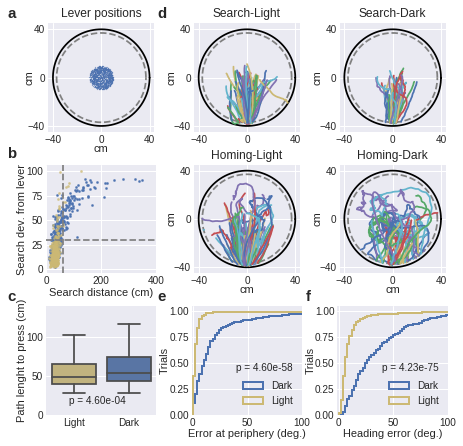

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
plt.style.use("seaborn")
al=0.6

col=3
row=3
sizePerPlot=2.4
fig = plt.figure(figsize=(col*sizePerPlot,row*sizePerPlot))
gs = gridspec.GridSpec(row,col,wspace=0.32, hspace=0.3) #
fig.tight_layout()

# to plot the arena circle
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
arenaRadiusProportionToPeri=0.925
arenaRadius = 40


dfC = df[(df["leverDistanceCenter"]<10)]
search_length_threshold = 60
search_heading_threshold = 30

######################
# a lever position
ax = plt.subplot(gs[0,0])
ax.set_title("Lever positions")
ax.set_aspect('equal', adjustable='box')
ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,color="black")
ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
                       color="gray",linestyle='dashed')
ax.set_xlabel("cm")
ax.set_ylabel("cm")
ax.set_ylim(-45,45)
ax.xaxis.set_label_coords(0.5, -0.11)
ax.yaxis.set_label_coords(-0.125, 0.5)
ax.set_xticks(np.arange(-40,80,40))
ax.set_yticks(np.arange(-40,80,40))
ax.tick_params(axis='both', which='major', pad=3)
ax.scatter(dfC["leverPressX"],dfC["leverPressY"], label = "lever press",s=1, alpha = 0.5)


#########################
# b search length / deviation from target
ax = plt.subplot(gs[1,0])
ax.scatter(dfC[dfC.light=="dark"]["searchArenaNoLever_length"],
           dfC[dfC.light=="dark"]["searchArenaNoLever_medianMVDeviationToTarget"] ,color = sns.color_palette()[0],s=5)
ax.scatter(dfC[dfC.light=="light"]["searchArenaNoLever_length"],
           dfC[dfC.light=="light"]["searchArenaNoLever_medianMVDeviationToTarget"],color = sns.color_palette()[4],alpha=0.8,s=5 )
ax.set_xlabel("Search distance (cm)")
ax.set_ylabel("Search dev. from lever")
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.135)
ax.yaxis.set_label_coords(-0.17, 0.5)
ax.axvline(x=search_length_threshold, color= "gray" ,linestyle='dashed')
ax.axhline(y=search_heading_threshold, color= "gray" ,linestyle='dashed')
ax.set_xlim(0,400)


##########################
# c distance to lever press
ax = plt.subplot(gs[2,0])
dfCs = dfC[(dfC.searchArenaNoLever_length < search_length_threshold) & (dfC.searchArenaNoLever_medianMVDeviationToTarget < search_heading_threshold)]
print("Number of selected trials: {}".format(len(dfCs)))
print("Number of selected light trials: {}".format(len(dfCs[dfCs["light"]=="light"])))
print("Number of selected dark trials: {}".format(len(dfCs[dfCs["light"]=="dark"])))

my_pal = {"light": sns.color_palette()[4], "dark": sns.color_palette()[0]}
sns.boxplot(y="searchArena_length", x='light', 
                 data=dfCs,showfliers=False,palette=my_pal)
ax.set_ylabel("Path lenght to press (cm)")
ax.set_xlabel("")
plt.xticks(range(2),labels=["Light","Dark"])
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.135)
ax.yaxis.set_label_coords(-0.17, 0.5)
ax.set_ylim(0,140)
valL = dfCs["searchArena_length"][dfCs.light=="light"]
valD = dfCs["searchArena_length"][dfCs.light=="dark"]
print("searchArena_length")
print("mean")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))
stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
ax.text(0.21,0.1,"p = {:.02e}".format(p_value),transform=ax.transAxes)


####################################
## duration until the lever press ##
####################################
valL = dfCs["searchArena_duration"][dfCs.light=="light"]
valD = dfCs["searchArena_duration"][dfCs.light=="dark"]
print("searchArena_duration")
print("mean")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))
print(stats.mannwhitneyu(x=valL, y =valD ))


#####################################
# c 
# search and homing paths, for direct search paths

mySessions = [ses1,ses2,ses3] 
pt_names=["Search","Homing"]
for k, pt in enumerate(["searchArenaNoLever","homingPeriNoLever"]):
    for j, lc in enumerate(["light","dark"]):
        ax = plt.subplot(gs[k,j+1])
        ax.set_title("{}-{}".format(pt_names[k],lc.capitalize()))
        ax.set_aspect('equal', adjustable='box')
        ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,color="black")
        ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
                       color="gray",linestyle='dashed')
        if k != 0:
            ax.set_xlabel("cm")
        ax.set_ylabel("cm")
        ax.set_ylim(-45,45)
        ax.xaxis.set_label_coords(0.5, -0.11)
        ax.yaxis.set_label_coords(-0.16, 0.5)
        ax.set_xticks(np.arange(-40,80,40))
        ax.set_yticks(np.arange(-40,80,40))
        ax.tick_params(axis='both', which='major', pad=3)

        for i, ses in enumerate(mySessions):   

            trials = [t for t in ses.trialList if t.light==lc and t.valid and t.pathD["searchArenaNoLever"].length < 50 and t.pathD["searchArenaNoLever"].medianMVDeviationToTarget < 30]

            ## plot the path 
            for t in trials:
                if t.pathD[pt].pPose is not None:
                    ax.plot(t.pathD[pt].pPose[:,0],t.pathD[pt].pPose[:,1])

#####################################
# e and f
# Homing error (2 measures) in light and dark

al = 1
ax = plt.subplot(gs[2,1])
valD = dfC["angularErrorHomingPeri"][(dfC.light=="dark") & 
                                     (dfC.searchArenaNoLever_length < search_length_threshold) &
                                     (dfC.searchArenaNoLever_medianMVDeviationToTarget < search_heading_threshold)]
valL = dfC["angularErrorHomingPeri"][(dfC.light=="light") & 
                                     (dfC.searchArenaNoLever_length < search_length_threshold) &
                                     (dfC.searchArenaNoLever_medianMVDeviationToTarget < search_heading_threshold)]

ax.hist(valD, bins = np.arange(0,180,2), alpha=al,color=sns.color_palette()[0],label="Dark",density=True,cumulative=True,lw=2,histtype='step')
#ax.axvline(x=np.nanmedian(valD),color= sns.color_palette()[0] ,linestyle='dashed')

ax.hist(valL, bins = np.arange(0,180,2),alpha=al,color=sns.color_palette()[4], label="Light",density=True,cumulative=True,lw=2,histtype='step')
#ax.axvline(x=np.nanmedian(valL), color= "black" ,linestyle='dashed')

stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
ax.text(0.4,0.4,"p = {:.02e}".format(p_value),transform=ax.transAxes)
print("mean error at peri")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median error at peri")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))

ax.set_xlim(-1,100)
ax.set_xlabel("Error at periphery (deg.)")
ax.set_ylabel("Trials")
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.13)
ax.yaxis.set_label_coords(-0.20, 0.5)
ax.legend(loc="lower right")




al = 1
ax = plt.subplot(gs[2,2])

valD = dfC["homingPeriNoLever_medianMVDeviationToTarget"][(dfC.light=="dark") & 
                                     (dfC.searchArenaNoLever_length < search_length_threshold) &
                                     (dfC.searchArenaNoLever_medianMVDeviationToTarget < search_heading_threshold)]
valL = dfC["homingPeriNoLever_medianMVDeviationToTarget"][(dfC.light=="light") & 
                                     (dfC.searchArenaNoLever_length < search_length_threshold) &
                                     (dfC.searchArenaNoLever_medianMVDeviationToTarget < search_heading_threshold)]

print("n dark: {}".format(valD.shape[0]))
print("n light: {}".format(valL.shape[0]))
ax.hist(valD, bins = np.arange(0,180,2), alpha=al,color=sns.color_palette()[0],label="Dark",density=True,cumulative=True,lw=2,histtype='step')
#ax.axvline(x=np.nanmedian(valD),color= sns.color_palette()[0] ,linestyle='dashed')

ax.hist(valL, bins = np.arange(0,180,2),alpha=al,color=sns.color_palette()[4], label="Light",density=True,cumulative=True,lw=2,histtype='step')
#ax.axvline(x=np.nanmedian(valL),color= "black" ,linestyle='dashed')

stat,p_value = stats.mannwhitneyu(x=valL, y =valD )
ax.text(0.4,0.4,"p = {:.02e}".format(p_value),transform=ax.transAxes)
print("mean heading error")
print("light: {}".format(np.nanmean(valL)))
print("dark: {}".format(np.nanmean(valD)))
print("median heading error")
print("light: {}".format(np.nanmedian(valL)))
print("dark: {}".format(np.nanmedian(valD)))
ax.set_xlim(-1,100)
ax.set_xlabel("Heading error (deg.)")
ax.set_ylabel("Trials")
ax.tick_params(axis='both', which='major', pad=3)
ax.xaxis.set_label_coords(0.5, -0.13)
ax.yaxis.set_label_coords(-0.20, 0.5)
ax.legend(loc = "lower right")



            
#######################################
### letters 
#######################################
plt.text(0.05,0.89, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.05,0.62, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.05,0.345, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.34,0.89, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.34,0.345, 'e', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.625,0.345, 'f', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)


###########################################
### save figure  
###########################################
fileName = myProject.dataPath+"/results/homing_error_short_search_01.pdf"
print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=400)

## Limitation of homing at periphery

The following code just shows how the position of the lever affects the homing at periphery. 

Probably because of 2 factors:

* If you head in straight line to the bridge, the position of the lever will affect your homing at periphery.
* If you home in a random direction from the lever, the distribution of homing at periphery will vary depending on the  position of the lever. 

Text(-0.01, 0.48, 'B')

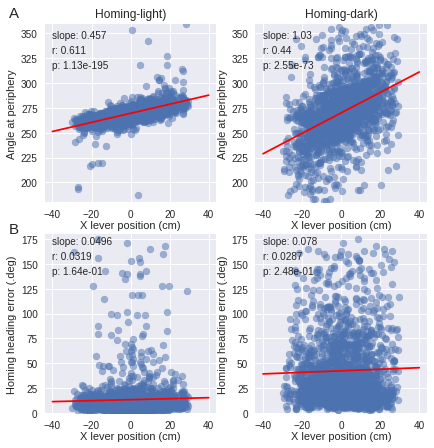

In [16]:
from scipy import stats

fig, axes = plt.subplots(2,2,figsize=(6,6))
fig.tight_layout()

axes[0,0].set_title("Homing-light)")
axes[0,1].set_title("Homing-dark)")

angleSel = df.peripheryAfterFirstLeverPressAngle>180

iRow=0
for i,condition in enumerate(["light","dark"]):
    x=df.leverPressX[(df.light==condition) & angleSel]
    y=df.peripheryAfterFirstLeverPressAngle[(df.light==condition) & angleSel]
    axes[iRow,i].scatter(x,y,alpha=0.5)
    axes[iRow,i].set_ylim(180,360)
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    x1=np.linspace(-40,40,100)
    y1=gradient*x1+intercept
    axes[iRow,i].plot(x1,y1,'-r')
    axes[iRow,i].set_xlabel("X lever position (cm)")
    axes[iRow,i].set_ylabel("Angle at periphery")
    axes[iRow,i].yaxis.set_label_coords(-0.16, 0.5)
    axes[iRow,i].xaxis.set_label_coords(0.5, -0.10)
    axes[iRow,i].text(-40,345, "slope: {0:.3}".format(gradient),fontsize=10)
    axes[iRow,i].text(-40,330, "r: {0:.3}".format(r_value),fontsize=10)
    axes[iRow,i].text(-40,315, "p: {0:.2e}".format(p_value),fontsize=10)

    
sel = ~np.isnan(df.homingPeriNoLever_medianHDDeviationToTarget)
iRow=1
for i,condition in enumerate(["light","dark"]):
    x=df.leverPressX[(df.light==condition) & sel]
    y=df.homingPeriNoLever_medianHDDeviationToTarget[(df.light==condition) & sel ]
    axes[iRow,i].scatter(x,y,alpha=0.5)
    #axes[iRow,i].set_ylim(180,360)
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    x1=np.linspace(-40,40,100)
    y1=gradient*x1+intercept
    axes[iRow,i].plot(x1,y1,'-r')
    axes[iRow,i].set_xlabel("X lever position (cm)")
    axes[iRow,i].set_ylabel("Homing heading error (.deg)")
    axes[iRow,i].yaxis.set_label_coords(-0.16, 0.5)
    axes[iRow,i].xaxis.set_label_coords(0.5, -0.1)
    axes[iRow,i].set_ylim(0,180)
    axes[iRow,i].text(-40,170, "slope: {0:.3}".format(gradient),fontsize=10)
    axes[iRow,i].text(-40,155, "r: {0:.3}".format(r_value),fontsize=10)
    axes[iRow,i].text(-40,140, "p: {0:.2e}".format(p_value),fontsize=10)

axes[0,0].text(-0.01,0.98, 'A', style='normal',fontsize=15, transform=plt.gcf().transFigure)
axes[0,0].text(-0.01,0.48, 'B', style='normal',fontsize=15, transform=plt.gcf().transFigure)

Supplementary Figure X: **Relationship between the lever position on the x-axis and two measure of homing accuracy**.
**(A)** Position of the lever on the x-axis and angle when the animal reached the arena periphery after pressing the lever. The angle at periphery is influenced by the position of the lever. 
**(B)** Position of the lever on the x-axis and mean homing heading error during the homing path. This measure takes into consideration the entire homing path and is less biased by the location of the lever on the arena.